## Machine Intelligence 6: Deep Neural Networks
Belugas on the run

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("Tensorflow version: " + tf.__version__)

Tensorflow version: 2.0.0


In [5]:
mnist = tf.keras.datasets.mnist

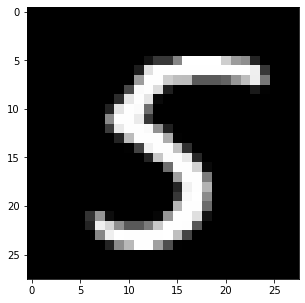

In [186]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#Just checking out the data:

plt.figure(figsize = (5,5))
plt.imshow(x_train[np.random.randint(0, len(x_train))], cmap = 'gray')

In [177]:
#Part (1): Train a linear model

lin_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax',
                        kernel_initializer = 'zeros',
                        use_bias = True,
                        bias_initializer = 'zeros')
])

lin_model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Getting summary of the model:

lin_model.summary()

#Set the learning rate:

lin_model.optimizer.lr = .5

#Fit the model:

lin_model.fit(x_train, y_train, batch_size = 100, epochs = 17)

#Evaluate the model:

lin_model.evaluate(x_train, y_train, verbose = 2) #on training set
lin_model.evaluate(x_test, y_test, verbose=2) #on hold-out set

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_63 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_169 (Dense)            (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/17
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3950 - accuracy: 0.8872
Epoch 2/17
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3063 - accuracy: 0.9133
Epoch 3/17
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2918 - accuracy: 0.9168
Epoch 4/17
60000/60000 [==============================] - 1s 13us/sample - loss: 0.2848 - accuracy: 0.9199
Epoch 5/17
60000/60000 [==============================] - 1s 1

[0.27771653480827807, 0.9224]

In [166]:
wghts = lin_model.get_weights()
wghts

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-1.0287154 ,  0.8822517 ,  0.2294641 , -0.6019657 ,  0.10574502,
         2.273805  , -0.37636167,  1.3453046 , -2.3290944 , -0.50042796],
       dtype=float32)]

We ran stochastic gradient descent on the training set for $\frac{10000 \cdot 100}{60000} \approx 17$ epochs. The accuracies of the linear model on the test- and hold-out set are comparable. On the test set it has an accuracy of 93.12%, with a performance of 92.46% on the the hold-out set.

In [170]:
#Part (2): Train a Multi-layer Perceptron:

#Defining initializers for layers:

trunc_normal = tf.keras.initializers.TruncatedNormal(mean=0, stddev=.01)
small_bias = tf.keras.initializers.constant(value = .1)

adam = tf.keras.optimizers.Adam(learning_rate=.001, 
                             beta_1= .9, 
                             beta_2= .999, 
                             epsilon = 1e-07,
                             amsgrad=False)

mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1500, activation= 'relu',
                        kernel_initializer = trunc_normal,
                        use_bias = True,
                        bias_initializer = small_bias),
    tf.keras.layers.Dense(1500, activation= 'relu',
                        kernel_initializer = trunc_normal,
                        use_bias = True,
                        bias_initializer = small_bias),
    tf.keras.layers.Dense(1500, activation= 'relu',
                        kernel_initializer = trunc_normal,
                        use_bias = True,
                        bias_initializer = small_bias),
    tf.keras.layers.Dense(10, activation= 'softmax',
                        kernel_initializer = trunc_normal,
                        use_bias = True,
                        bias_initializer = small_bias)

 ])

new_model = tf.kerals 

#Summarizing the model:

mlp_model.summary()

#Weights after training:

mlp_wghts = mlp_model.get_weights()
#mlp_wghts

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_56 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_156 (Dense)            (None, 1500)              1177500   
_________________________________________________________________
dense_157 (Dense)            (None, 1500)              2251500   
_________________________________________________________________
dense_158 (Dense)            (None, 1500)              2251500   
_________________________________________________________________
dense_159 (Dense)            (None, 10)                15010     
Total params: 5,695,510
Trainable params: 5,695,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compiling the model:

mlp_model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Fitting the model:

mlp_model.fit(x_train, y_train, batch_size = 100, epochs = 34)

#Evaluate the model:

mlp_model.evaluate(x_train, y_train, verbose = 2) #on training set
mlp_model.evaluate(x_test, y_test, verbose=2) #on hold-out se

In [87]:
#Get the weight matrix and the trained biases:

wght_matr = mlp_model.layers[1].get_weights()[0]
bias = mlp_model.layers[1].get_weights()[1]

[[-0.00805286  0.00753473  0.00910047 ...  0.01426506 -0.01038765
  -0.00814988]
 [ 0.00776395 -0.00252953 -0.00112258 ... -0.00355989  0.00945012
  -0.00298003]
 [-0.00469809 -0.00160829 -0.00199437 ... -0.01006735  0.0193077
  -0.00521336]
 ...
 [-0.00416496 -0.01915614 -0.00061498 ...  0.00109299  0.00871983
  -0.00250383]
 [-0.00195093  0.0041697  -0.00619997 ...  0.01167369  0.00381235
   0.00070498]
 [-0.00150265 -0.00027623  0.01187981 ...  0.0183203  -0.00428199
   0.00087309]]


In [171]:
#Part (3): 

mlp_drpt_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1500, activation= 'relu',
                        kernel_initializer = trunc_normal,
                        use_bias = True,
                        bias_initializer = small_bias),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1500, activation= 'relu',
                        kernel_initializer = trunc_normal,
                        use_bias = True,
                        bias_initializer = small_bias),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1500, activation= 'relu',
                        kernel_initializer = trunc_normal,
                        use_bias = True,
                        bias_initializer = small_bias),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(10, activation= 'softmax',
                        kernel_initializer = trunc_normal,
                        use_bias = True,
                        bias_initializer = small_bias)

 ])      

#Summarizing the model:

mlp_drpt_model.summary()


Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_57 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_160 (Dense)            (None, 1500)              1177500   
_________________________________________________________________
dropout_12 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_161 (Dense)            (None, 1500)              2251500   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_162 (Dense)            (None, 1500)              2251500   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1500)            

In [ ]:
#Same old, same old:

#Compiling the model:

mlp_drpt_model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#Fitting the model:

mlp_drpt_model.fit(x_train, y_train, batch_size = 100, epochs = 34)

#Evaluate the model:

mlp_drpt_model.evaluate(x_train, y_train, verbose = 2) #on training set
mlp_drpt_model.evaluate(x_test, y_test, verbose=2) #on hold-out set

In [172]:
#Part (4):

#Reshaping data, to allow convolution:

x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
shape_of_input = (28, 28, 1)

#Getting started on the network:

conv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), strides = (1,1), padding = 'same',
                           input_shape = shape_of_input,
                           activation = 'relu',
                           kernel_initializer = trunc_normal,
                           use_bias = True,
                           bias_initializer = small_bias),
    tf.keras.layers.MaxPooling2D((2,2,), strides = (2,2)),
    tf.keras.layers.Conv2D(64, (5,5), strides = (1,1), padding = 'same',
                           input_shape = shape_of_input,
                           activation = 'relu',
                           kernel_initializer = trunc_normal,
                           use_bias = True,
                           bias_initializer = small_bias),
    tf.keras.layers.MaxPooling2D((2,2,), strides = (2,2)),
    tf.keras.layers.Flatten(), #flatten before feeding to CNN layer
    tf.keras.layers.Dense(10, activation= 'softmax',
                        kernel_initializer = trunc_normal,
                        use_bias = True,
                        bias_initializer = small_bias)
    
])

#Get a summary of the model 

conv_model.summary()

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_58 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_164 (Dense)            (None, 10)                31370     
Total params: 83,466
Trainable params: 83,466
Non-trainable params: 0
_________________________________________________

In [ ]:
#Compiling the model:

conv_model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#Fitting the model:

conv_model.fit(x_train_conv, y_train_conv, batch_size = 100, epochs = 34)

#Evaluate the model:

conv_model.evaluate(x_train_conv, y_train, verbose = 2) #on training set
conv_model.evaluate(x_test_conv, y_test, verbose=2) #on hold-out se

In [ ]:
#Part (5) – Compare the results:


